## Anna Urbala - PD7

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn import metrics

In [2]:
def gauss(x, t):
    return math.exp(-(x * t)**2)

def ricker_wavelet(x, t):
    return math.exp(-((x * t)**2)) * (2-4*((x*t)**2)) * t * t

class Kohonen:
    def __init__(self, M, N, data, width=1):
        self.M = M
        self.N = N
        self.data = data 
        self.neurons = np.random.normal(0, np.max(data), size=(N*M, data.shape[1]))
        self.width = width
        self.norm_fun = np.linalg.norm
        
    @staticmethod
    def alpha(t, l):
        return math.exp(-t/l)
    
    def get_classes(self):
        return [np.argmin([self.norm_fun(n-x) for n in self.neurons]) for x in self.data]
    
    def dist(self, n1, n2):
        (i1, i2, j1, j2) = (n1 % self.N, n2 % self.N, math.floor(n1 / self.N), math.floor(n2 / self.N))
        return self.width * self.norm_fun([i1 - i2, j1 - j2])
    
    def learn(self, l, neigh_fun=gauss):
        for t in range(l):
            tmp = np.random.permutation(len(self.data))
            permutation = self.data[tmp]
            for row in permutation:
                n_min = np.argmin([self.norm_fun(row-n) for n in self.neurons])
                for i, n in enumerate(self.neurons):
                    self.neurons[i] += neigh_fun(self.dist(n_min, i), t+1) * self.alpha(t + 1, l)*(row - n)
        return self.get_classes()

### Hexagon

In [3]:
df = pd.read_csv('mio2/hexagon.csv')
x = np.asarray(df.iloc[:,0:2])
df

,x,y,c
0,2.402047,3.728695,1
1,-0.660032,7.047206,0
2,2.202839,-2.394303,2
3,3.179183,2.593885,1
4,3.173320,-2.152688,2
...,...,...,...
595,-2.186246,-4.059754,4
596,4.089715,-2.879358,2
597,-3.014489,-2.824257,4
598,3.746346,3.001876,1


Text(0.5, 1.0, 'Hexagon')

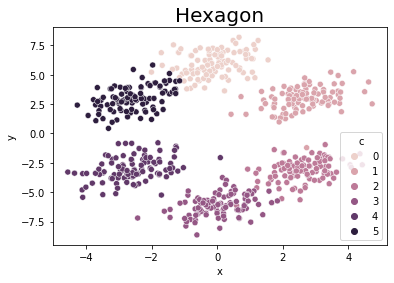

In [4]:
sns.scatterplot(x='x', y='y', hue='c', data=df)
plt.title('Hexagon', fontsize=20)

##### gauss, width=1, MxN=9

0.7908440804022195
[0 1 2 3 4 5 6 7 8]


<AxesSubplot:xlabel='x', ylabel='y'>

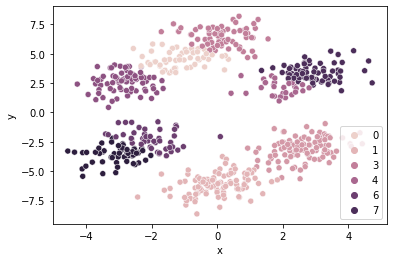

In [5]:
np.random.seed(2137)
x = np.asarray(df.iloc[:,[0,1]])
som = Kohonen(3,3,x)
c = som.learn(50)
print(metrics.completeness_score(df['c'], c))
print(np.unique(c))
sns.scatterplot(x='x', y='y', hue=c, data=df)

##### gauss, width=0.1, MxN=9

0.7908440804022197
[0 1 2 3 4 5 6 7 8]


<AxesSubplot:xlabel='x', ylabel='y'>

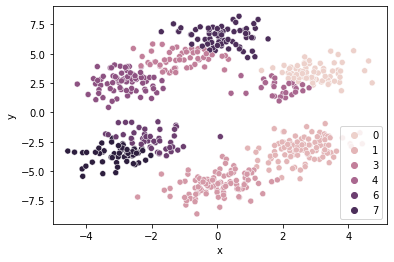

In [6]:
np.random.seed(2137)
som = Kohonen(3,3,x,0.1)
c = som.learn(50)
print(metrics.completeness_score(df['c'], c))
print(np.unique(c))
sns.scatterplot(x='x', y='y', hue=c, data=df)

##### gauss, width=1, MxN=6

0.9383017799946632
[0 1 2 3 4 5]


<AxesSubplot:xlabel='x', ylabel='y'>

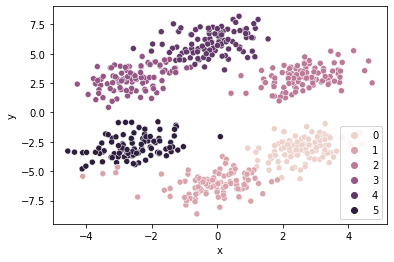

In [7]:
np.random.seed(2137)
som = Kohonen(3,2,x)
c = som.learn(50)
print(metrics.completeness_score(df['c'], c))
print(np.unique(c))
sns.scatterplot(x='x', y='y', hue=c, data=df)

##### gauss, width=0.1, MxN=6

0.9383017799946635
[0 1 2 3 4 5]


<AxesSubplot:xlabel='x', ylabel='y'>

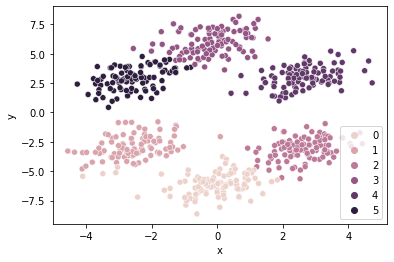

In [8]:
np.random.seed(2137)
som = Kohonen(3,2,x,0.1)
c = som.learn(50)
print(metrics.completeness_score(df['c'], c))
print(np.unique(c))
sns.scatterplot(x='x', y='y', hue=c, data=df)

##### ricker_wavelet, width=0.1, MxN=6

0.6891217875636276
[0 1 2 3 4 5]


<AxesSubplot:xlabel='x', ylabel='y'>

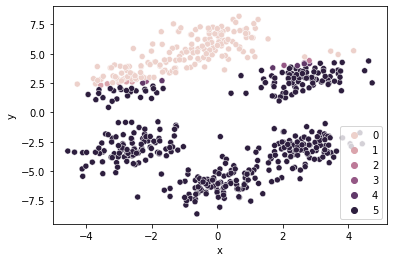

In [13]:
np.random.seed(2137)
som = Kohonen(3,2,x, 0.1)
c = som.learn(1, neigh_fun=ricker_wavelet)
print(metrics.completeness_score(df['c'], c))
print(np.unique(c))
sns.scatterplot(x='x', y='y', hue=c, data=df)

##### ricker_wavelet, width=0.1, MxN=9

0.6891217875636276
[0 1 2 3 4 5]


<AxesSubplot:xlabel='x', ylabel='y'>

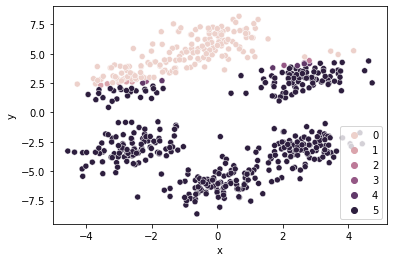

In [16]:
np.random.seed(2137)
som = Kohonen(3,2,x, 0.1)
c = som.learn(1, neigh_fun=ricker_wavelet)
print(metrics.completeness_score(df['c'], c))
print(np.unique(c))
sns.scatterplot(x='x', y='y', hue=c, data=df)

##### ricker_wavelet_mod, width=1, MxN=6

0.9519204064758416
[0 1 2 3 5]


<AxesSubplot:xlabel='x', ylabel='y'>

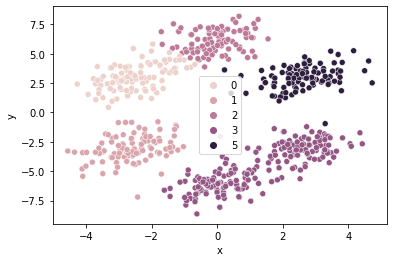

In [23]:
def ricker_wavelet_mod(x, t):
    return max(ricker_wavelet(x, 1), 0)

np.random.seed(1)
som = Kohonen(3,2,x, 1)
c = som.learn(50, neigh_fun=ricker_wavelet_mod)
print(metrics.completeness_score(df['c'], c))
print(np.unique(c))
sns.scatterplot(x='x', y='y', hue=c, data=df)

##### ricker_wavelet_mod, width=1, MxN=9

0.9098872905025709
[0 1 2 3 4 5]


<AxesSubplot:xlabel='x', ylabel='y'>

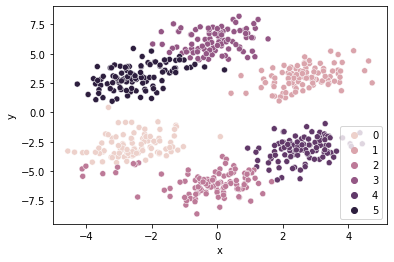

In [24]:
np.random.seed(2137)
som = Kohonen(3,3,x)
c = som.learn(50, neigh_fun=ricker_wavelet_mod)
print(metrics.completeness_score(df['c'], c))
print(np.unique(c))
sns.scatterplot(x='x', y='y', hue=c, data=df)

### Cube

In [25]:
df = pd.read_csv('mio2/cube.csv')
x = np.asarray(df.iloc[:,0:3])
df

,x,y,z,c
0,0.187781,0.239537,0.382492,0
1,-1.308979,-0.143321,-0.966648,0
2,-0.987613,0.679918,-0.037552,0
3,0.924980,0.607235,-0.146856,0
4,-0.098663,0.004329,-0.588876,0
...,...,...,...,...
1195,2.740583,3.037202,2.723101,7
1196,2.303258,4.337946,2.798172,7
1197,3.528407,4.575523,1.406155,7
1198,2.236023,3.901189,1.529630,7


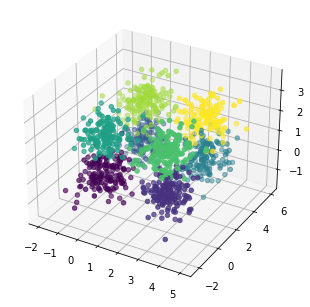

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df['x'], df['y'], df['z'], c=df['c'])

##### gauss, MxN=8

0.9027386102972268
[0 1 2 3 4 5 6 7]


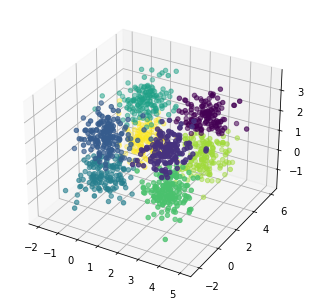

In [27]:
np.random.seed(2137)
som = Kohonen(4,2,x)
c = som.learn(50, neigh_fun=gauss)
print(metrics.completeness_score(df['c'], c))
print(np.unique(c))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df['x'], df['y'], df['z'], c=c)

##### ricker_wavelet_mod, MxN=8

0.78851372616555
[0 1 2 3 6]


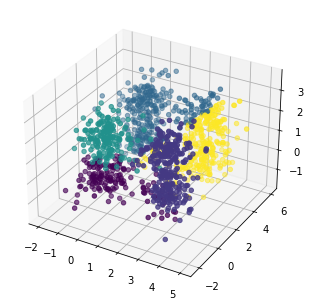

In [29]:
np.random.seed(2137)
som = Kohonen(4,2,x)
c = som.learn(50, neigh_fun=ricker_wavelet_mod)
print(metrics.completeness_score(df['c'], c))
print(np.unique(c))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df['x'], df['y'], df['z'], c=c)

##### gauss, MxN=12

0.767944789879439
[ 0  1  2  3  4  5  6  7  8  9 10 11]


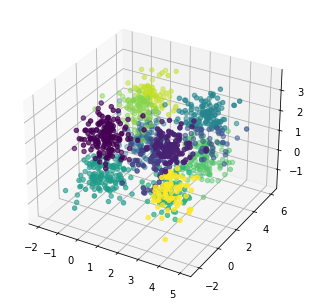

In [30]:
np.random.seed(2137)
som = Kohonen(4,3,x)
c = som.learn(50, neigh_fun=gauss)
print(metrics.completeness_score(df['c'], c))
print(np.unique(c))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df['x'], df['y'], df['z'], c=c)

##### ricker_wavelet_mod, MxN=12

0.8480553297133886
[ 0  1  2  6  8 10]


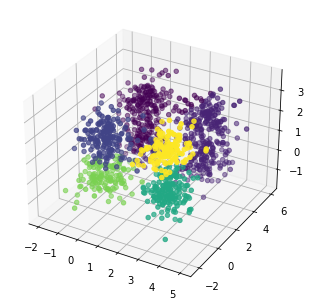

In [31]:
np.random.seed(2137)
som = Kohonen(4,3,x)
c = som.learn(50, neigh_fun=ricker_wavelet_mod)
print(metrics.completeness_score(df['c'], c))
print(np.unique(c))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df['x'], df['y'], df['z'], c=c)

##### Uwaga dot. meksykańskiego kapelusza
Wartości wyliczane przy pomocy orginalnego meksykańskiego kapelusza przekraczały szybko dopuszczalny zakres, dlatego napisałam modyfikację i w dalszej części zadania rozważałam tylko ją. Modyfikacja - nie uwzględnia czasu w funkcji i obcina ujemne do 0.

1. Czy klastry w odwzorowaniu znalezionym przez sieć pokrywają się w liczbą klastrów w faktycznych danych?

Czasem. Dla gaussa znajdujemy za dużo klastrów (chyba że ograniczymy liczbę wierzchołków sieci do "właściwego" k), ale złączenie najbliższych dałoby oczekiwany rezultat (być może wystarczy lepiej dostosować szerokość lub liczbę iteracji). Zaś dla zmodyfikowanego hiszpańskiego kapelusza zazwyczaj dostajemy za mało klastrów, ale przynajmniej dzięki temu dostajemy niezły completeness score. Dobry wynik udało się uzyskać dla `ricker_wavelet_mod,-width=1,-MxN=9`, faktycznie otrzymaliśmy 6 klastrów. (Udało się też uzyskać 6 dla zwykłego kapelusza po 1 iteracji, ale wynik jest daleki od sensownego).

2. Czy znalezione klastry pokrywają się z identyfikatorami wierzchołków?

Z dokładnością do sąsiedniego klastra tak. Idealnie nie jest (czasem 2 wierzchołki łączą się w 1), ale zdecydowanie widać pewną strukturę.